# Regressão Logística

Apesar do nome, a Regressão Logística é usada para **classificação**. Ela modela a probabilidade de uma determinada classe ou evento existir, como aprovado/reprovado, sim/não, etc.

Ela usa a função logística (ou sigmoide) para transformar a saída de uma equação linear em uma probabilidade (um valor entre 0 e 1).

$$ P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + ...)}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification

In [3]:

# Gerando dados de classificação sintéticos
X, y = make_classification(
    n_samples=200, 
    n_features=2, 
    n_redundant=0, 
    n_informative=2,
    random_state=1, 
    n_clusters_per_class=1
)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Criando e treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo predições
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}\n")
print("Matriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)

Acurácia: 0.88

Matriz de Confusão:
[[26  5]
 [ 1 18]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.78      0.95      0.86        19

    accuracy                           0.88        50
   macro avg       0.87      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



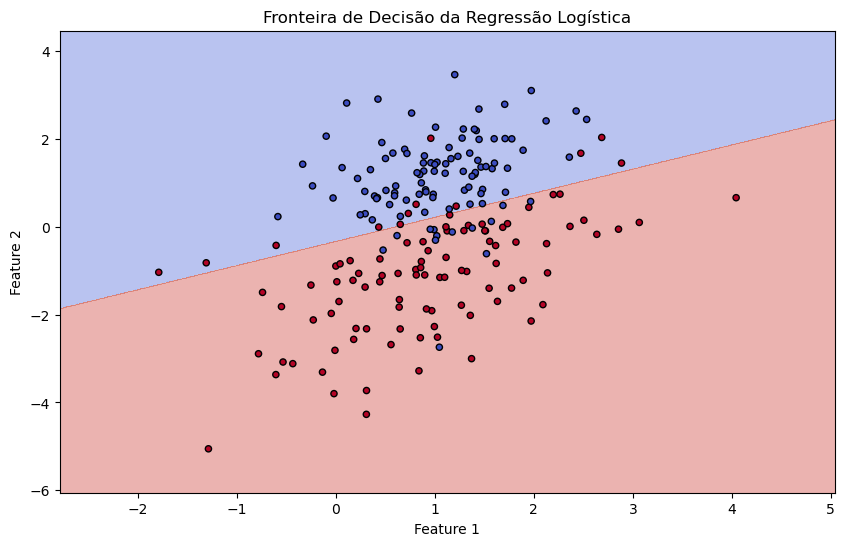

In [5]:
# Visualizando a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('Fronteira de Decisão da Regressão Logística')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()